# Clustering
Below shows examples of clustering using hierarchical,CURE and DBSCAN clustering methods in kdb+/q.

### Dependencies
To run the below notebook, the following dependencies are required.
```
- embedPy
- matplotlib
- matplot3d
- pyclustering
- sklearn
```

In [1]:
\l ../clust.q
\l ../graphics.q
plt:.p.import`matplotlib.pyplot
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fcps:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:.p.import[`pyclustering.utils]`:read_sample

### Example 1

In [2]:
d1:(60#"F";",")0:`:../../data/ss5.csv

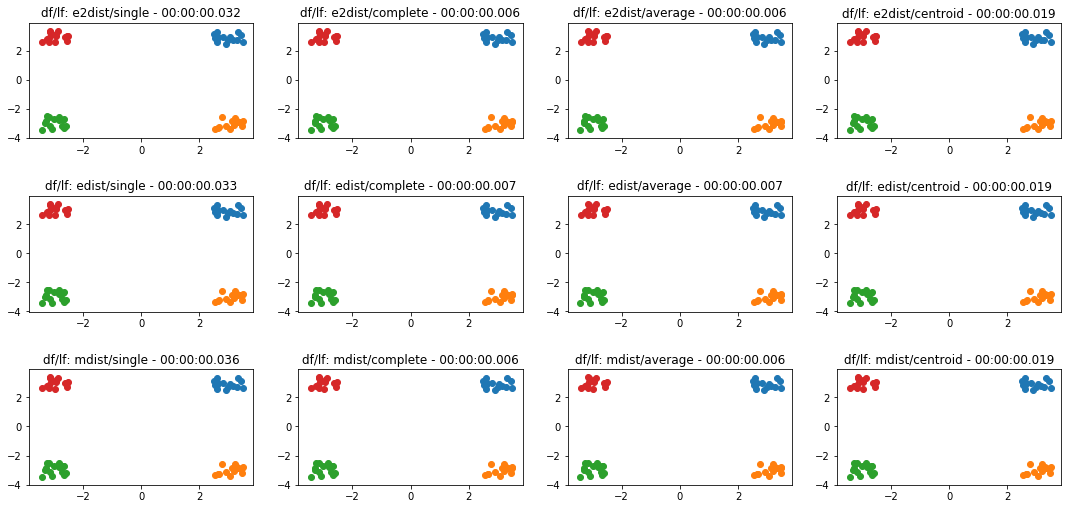

In [3]:
/`single`complete`average`centroid w/ e2dist,edist and mdist
.clust.plot[d1;4;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]]

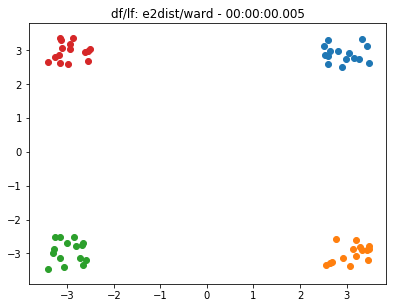

In [4]:
/ward w/ e2dist
.clust.plotwdb[`ward;d1;(4;`e2dist;`ward)]

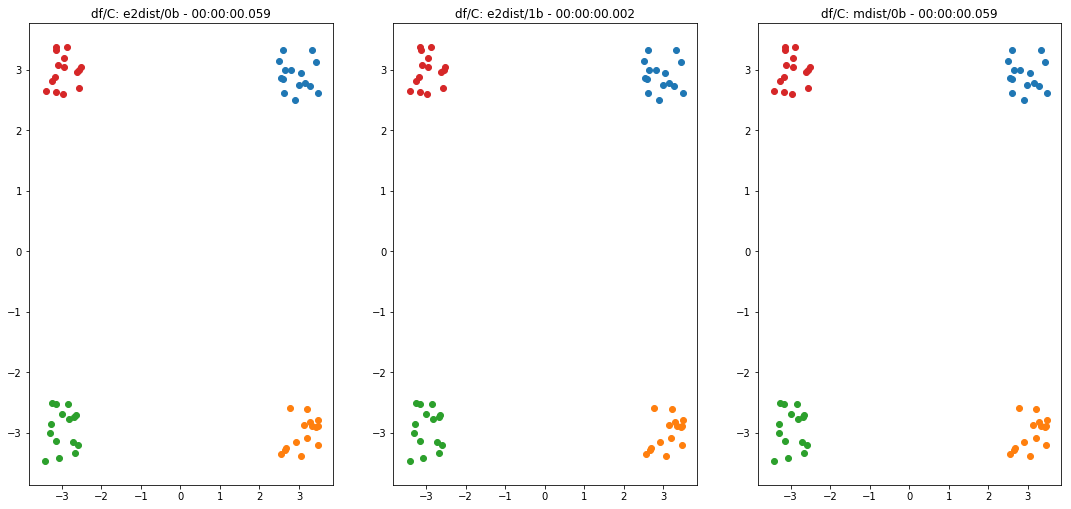

In [5]:
/cure w/ e2dist (q and q with C) and mdist (q only)
.clust.plot[d1;4;-1_(cross/)(`e2dist`mdist;5;0;01b;0b)]

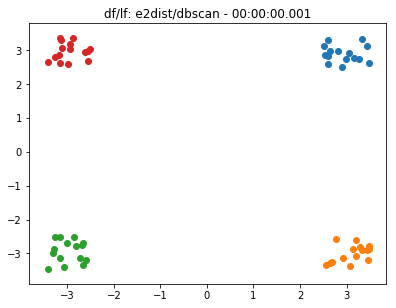

In [6]:
/dbscan using e2dist
.clust.plotwdb[`dbscan;d1;5 5]

### Example 2

In [7]:
d2:flip@[;`Income`SpendingScore]("SSFFF";(),",")0:`:../../data/cust.csv

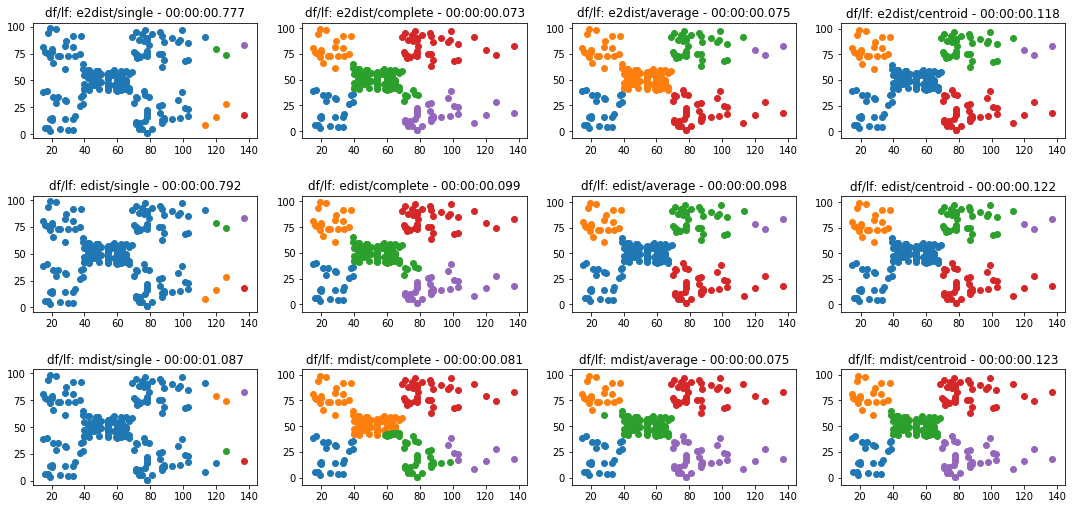

In [8]:
/`single`complete`average`centroid
.clust.plot[d2;5;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]]

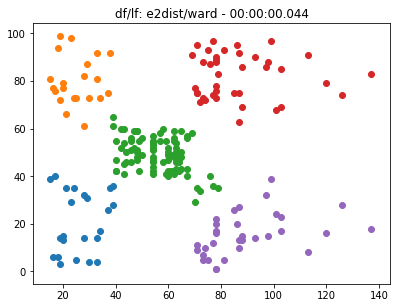

In [9]:
/ward
.clust.plotwdb[`ward;d2;(5;`e2dist;`ward)]

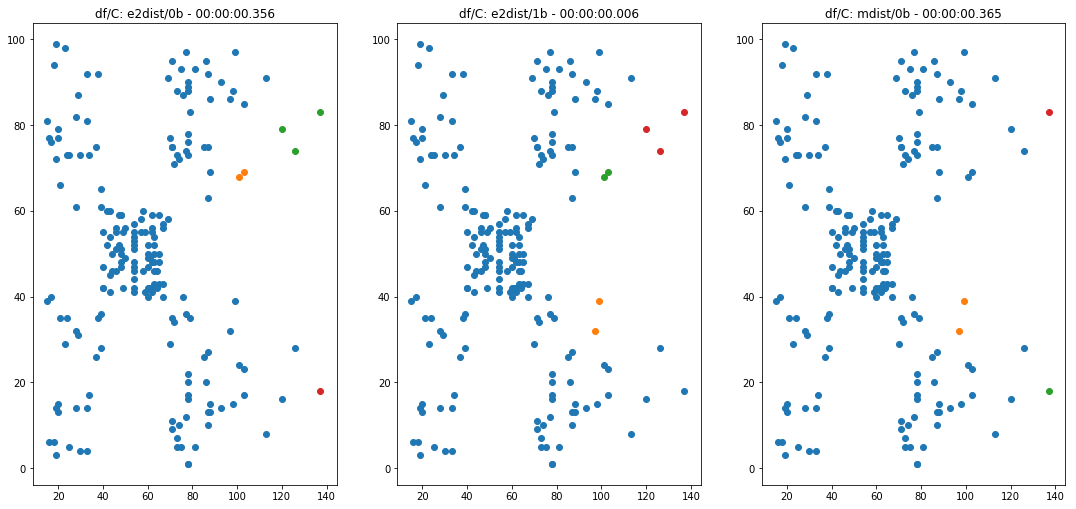

In [10]:
/cure
.clust.plot[d2;4;-1_(cross/)(`e2dist`mdist;5;0;01b;0b)]

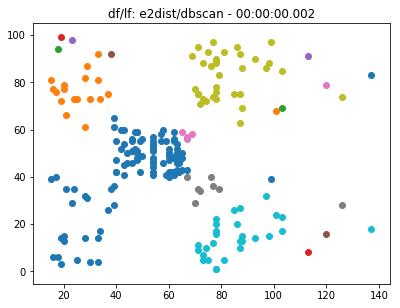

In [11]:
/dbscan
.clust.plotwdb[`dbscan;d2;3 100]

### Example 3

In [12]:
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
d3 :flip(-5 1)+(1 1.5)*dsc[1000;0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
d3,:flip(4 -1)+(1 8)*dsc[4000;0;1.]
d3@:neg[1000&count d3]?count d3

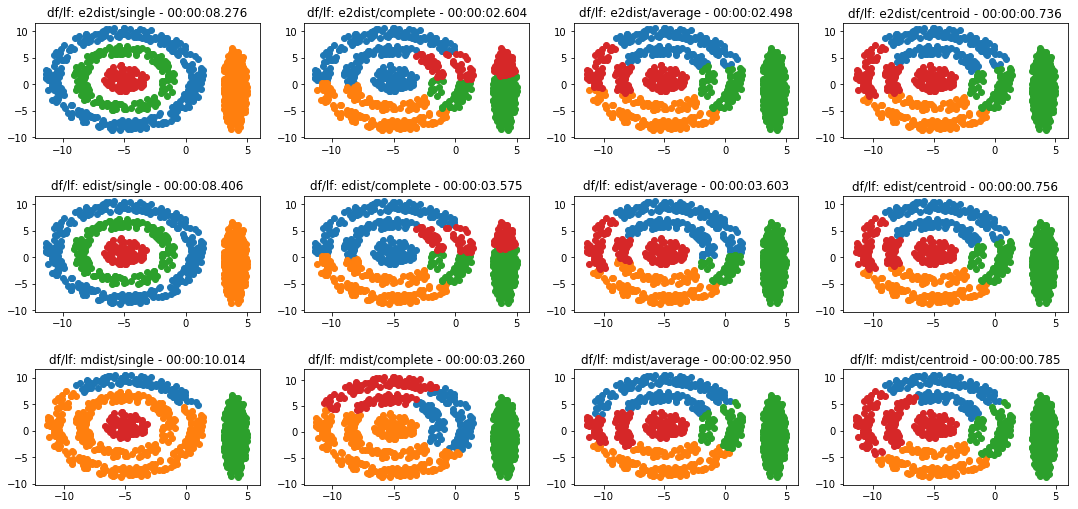

In [13]:
/`single`complete`average`centroid
.clust.plot[d3;4;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]]

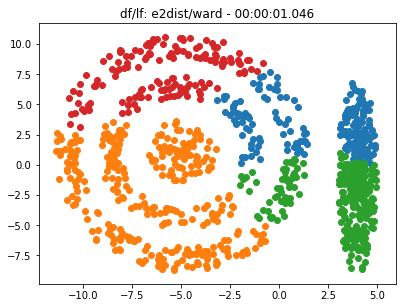

In [14]:
/ward
.clust.plotwdb[`ward;d3;(4;`e2dist;`ward)]

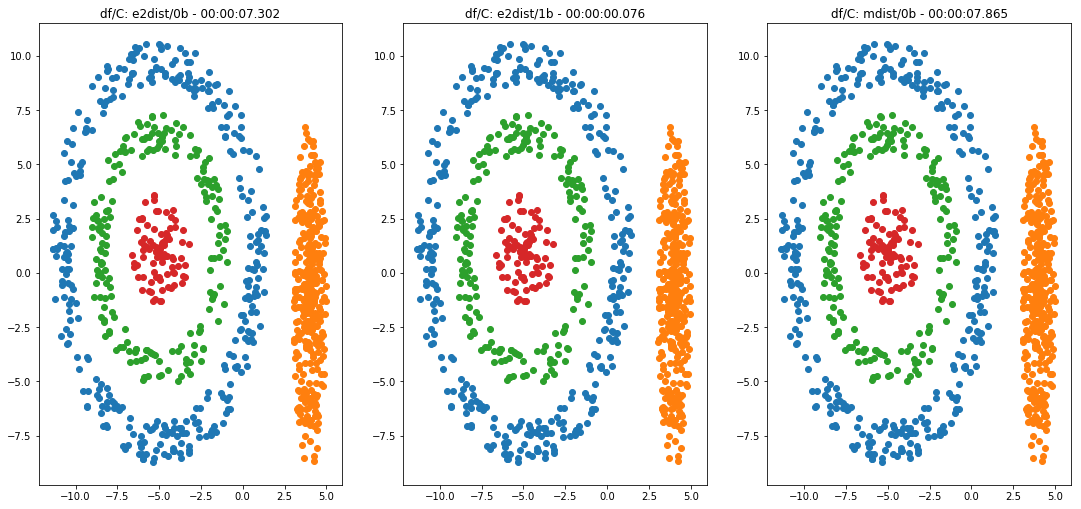

In [15]:
/cure
.clust.plot[d3;4;-1_(cross/)(`e2dist`mdist;30;0;01b;0b)]

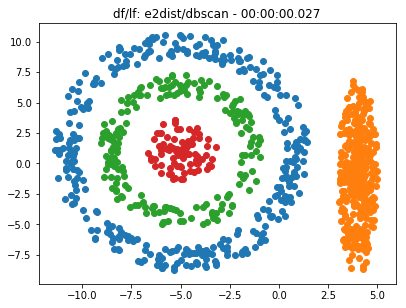

In [16]:
/dbscan
.clust.plotwdb[`dbscan;d3;2 1.2];
plt[`:show][];

### Example 4 - 3D

In [17]:
d4:read[fcps`:SAMPLE_CHAINLINK]`

In [18]:
plot3d:{
 fig::plt[`:figure][];
 fig[`:set_size_inches;18.5;10.5];
 {[d;c;f;i]
  ax:fig[`:add_subplot][;;i+1;`projection pykw"3d"]. $[b:2~count f;3 4;1 3];
  s:.z.t;
  r:$[b;.clust.hc;.clust.cure][d;c;] . f;
  t:.z.t-s;
  {x[`:scatter][;;]. flip y}[ax]each exec pts by clt from r;
  ax[`:set_title]"df/lf: ",string[f 0],"/",$[b;string f 1;string[f 3],"b"]," - ",string t
  }[x;y]'[z;til count z];
 plt[`:show][];
 }

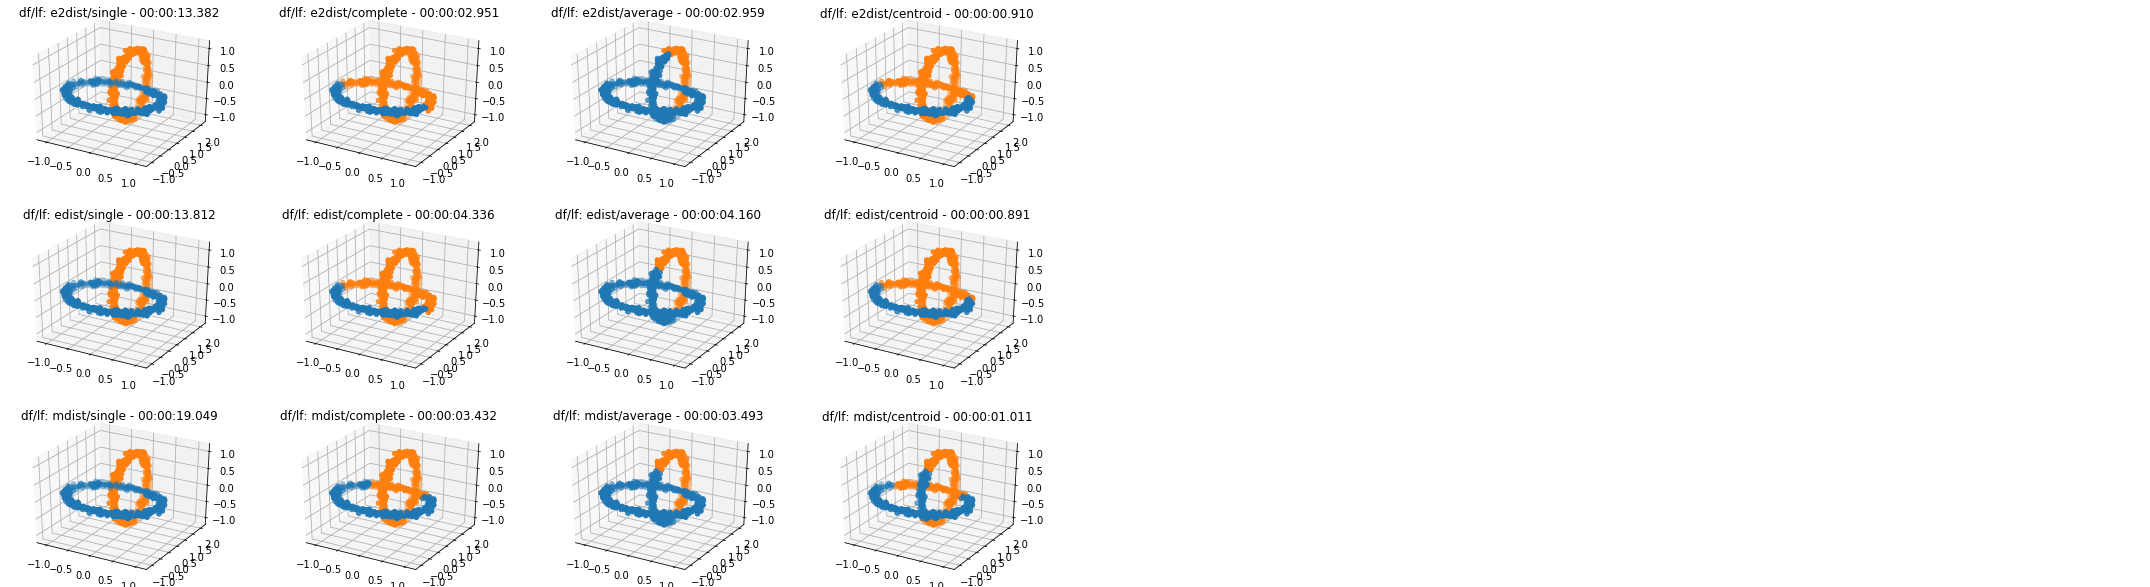

In [19]:
/`single`complete`average`centroid
plot3d[d4;2;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]]

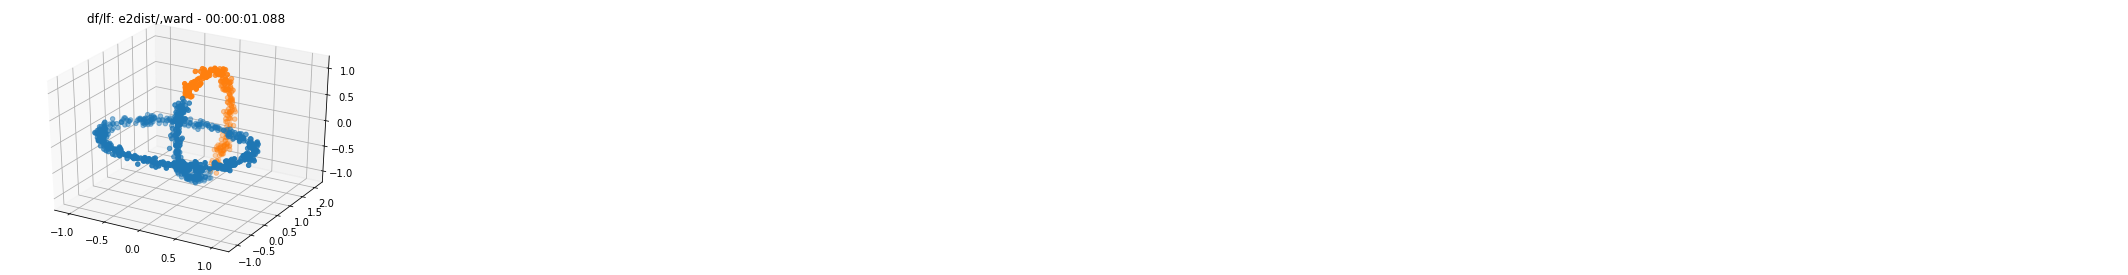

In [20]:
/ward
.clust.plotwdb3d[`ward;d4;(2;`e2dist;`ward)]

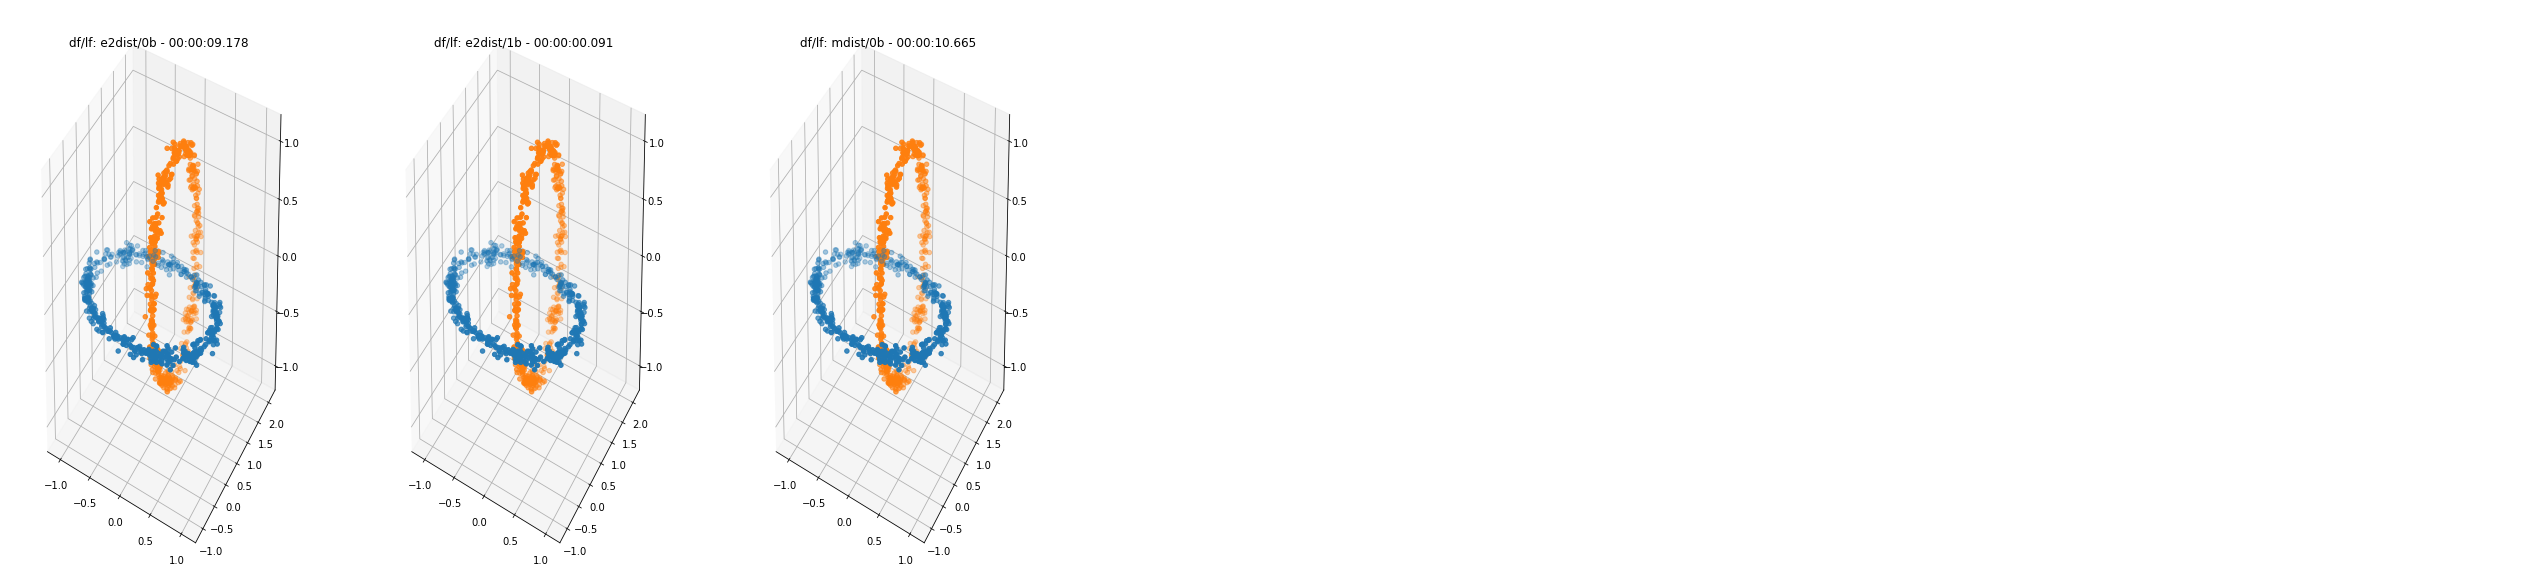

In [21]:
/cure
plot3d[d4;2;-1_(cross/)(`e2dist`mdist;30;0;01b;0b)];

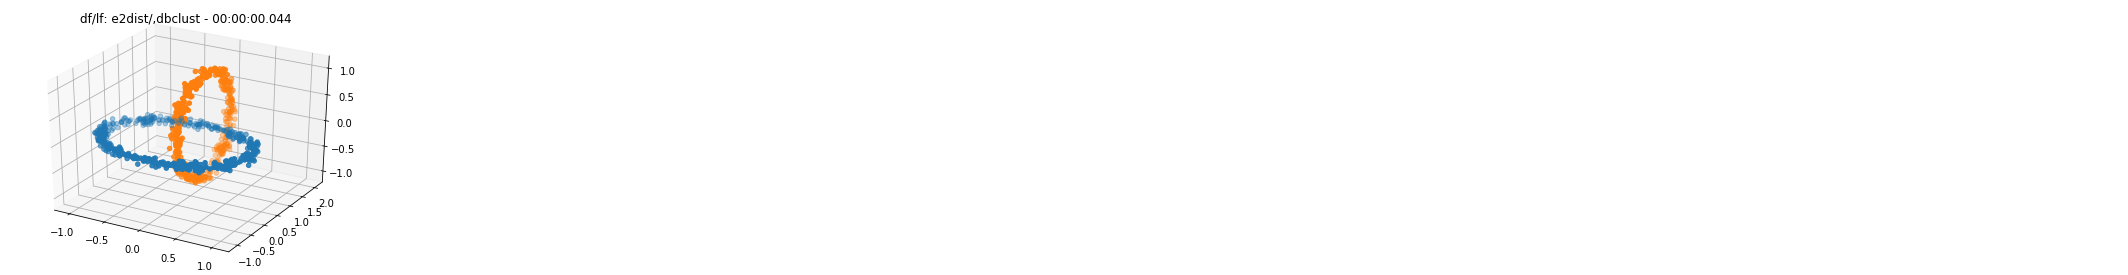

In [22]:
/dbscan
.clust.plotwdb3d[`dbclust;d4;20 .1]

---